In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Credit card fraud detection.csv')

In [3]:
data.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [4]:
data.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [5]:
data.shape

(284807, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
duplicate_rows=data[data.duplicated()]
print("Number of duplicate rows",duplicate_rows.shape)

Number of duplicate rows (1081, 31)


In [8]:
data=data.drop_duplicates()  # removing duplicates
data.shape
print(data.shape)

(283726, 31)


In [9]:
data['Class'].value_counts() # distribution of valid and fraud transaction

0    283253
1       473
Name: Class, dtype: int64

In [10]:
# separating the data for analysis
valid = data[data.Class == 0]
fraud = data[data.Class == 1]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0016698852262818046
fraud Cases: 473
Valid Transactions: 283253


In [11]:
valid.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
# compare the values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [14]:
print('Valid transaction',round(data['Class'].value_counts()[0]/len(data)*100,2),'%')
print('fake transaction',round(data['Class'].value_counts()[1]/len(data)*100,2),'%')

Valid transaction 99.83 %
fake transaction 0.17 %


Text(0.5, 1.0, '0- VALID ,1- FAKE')

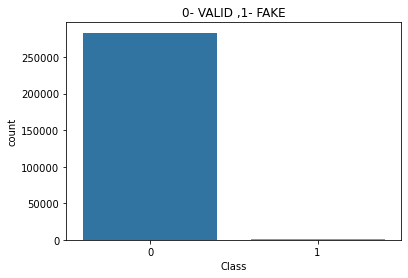

In [15]:
sns.countplot('Class',data=data)
plt.title('0- VALID ,1- FAKE')


### VISUALIZATION

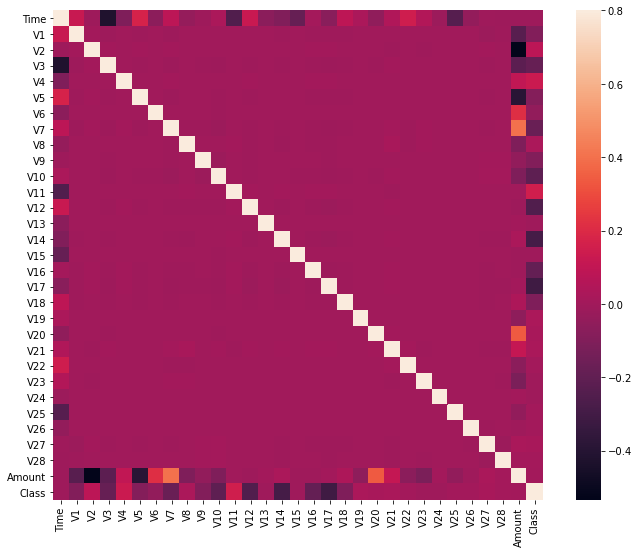

In [16]:
# #Plotting heatmap to analyze the dependency and relationship between features
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [17]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount)
# Robust scaling techniques that use percentiles can be used to scale numerical input variables that contain outliers.

std_scaler = StandardScaler()    
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data.drop(['Amount'], axis=1, inplace=True)

#This Scaler responds well if the standard deviation is small and when a distribution is not Gaussian. 
#This Scaler is sensitive to outliers. The Standard Scaler assumes data is normally distributed within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1.

It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. 

In [18]:
scaled_amount = data['scaled_amount']

data.drop(['scaled_amount'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)

data.head()

#It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data.
#Standardization is useful for data which has negative values.
#It arranges the data in a standard normal distribution.

,scaled_amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411487,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667362,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [20]:
# Splitting into independent and dependent attribute
x = data.drop(['Time','Class'], axis=1)
y = data['Class']

### CREATING A SAMPLE FROM THE DATASET
Since our classes are highly skewed we should make them equivalent to have a normal distribution of the classes. 
For that we are going to create a subsample from our dataset, i.e., we will take a small number(equal to the number of fraud transactions) of VALID transaction and combine them with FRAUD transactions.
So that our subsample will have equal number of valid and fraud transactions and out model will trian correctly. We'll shuffle the data before creating the subsample.

In [27]:
data = data.sample(frac=1)

fraud_data = data.loc[data['Class'] == 1]                      # Extracting fraud transactions
valid_data = data.loc[data['Class'] == 0][:473]                # Amount of fraud transactions is 473.

normal_distributed_data = pd.concat([fraud_data, valid_data])  # Combining Valid and Fraud Transactions

new_dataset = normal_distributed_data.sample(frac=1, random_state=42) # Shuffling dataframe rows

new_dataset.head()        # The sample from the dataset

,scaled_amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
191690,-0.305938,129371.0,1.183931,3.057250,-6.161997,5.543972,1.617041,-1.848006,-1.005508,0.339937,...,0.252571,0.109185,-0.931072,-0.064175,-0.007013,0.345419,0.064558,0.476629,0.323740,1
181966,0.250313,125200.0,-0.769172,1.342212,-2.171454,-0.151513,-0.648374,-0.973504,-1.706658,0.313745,...,-0.102294,-0.036122,-0.753591,-0.047113,0.358493,-0.287407,0.476506,0.250531,0.250987,1
264954,1.627034,161667.0,1.701899,-0.471636,-0.318274,1.436789,-0.647441,-0.497848,-0.223039,-0.161716,...,0.086628,0.317725,0.824209,0.009606,0.066217,-0.103596,-0.581927,0.038780,-0.004279,0
30442,-0.242525,35926.0,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,...,0.757287,1.691042,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,1
6882,-0.290641,8808.0,-4.617217,1.695694,-3.114372,4.328199,-1.873257,-0.989908,-4.577265,0.472216,...,-0.039046,0.481830,0.146023,0.117039,-0.217565,-0.138776,-0.424453,-1.002041,0.890780,1


In [28]:
new_dataset.shape

(946, 31)

In [30]:
print('Distribution of the Classes in the subsample dataset')
print(new_dataset['Class'].value_counts()/len(new_dataset))



Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


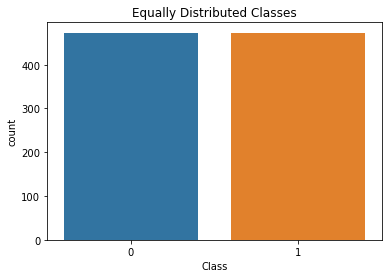

In [33]:
sns.countplot('Class', data=new_dataset)
plt.title('Equally Distributed Classes')
plt.show()

#### New Sample extracted from the dataset having equal number of fraud and valid transactions

### Splitting new dataset

In [34]:
x = new_dataset.drop(['Time', 'Class'], axis=1)
y = new_dataset['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(756, 29) (190, 29)


### LOGISTIC REGRESSION

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

#### ACCURACY SCORE

In [36]:
y_pred = model.predict(x_test)
print("Accuracy score:",(round(accuracy_score(y_test, y_pred)*100, 2)),'%')

Accuracy score: 94.21 %


### CONFUSION MATRIX

[Text(0, 0.5, ''), Text(0, 1.5, '')]

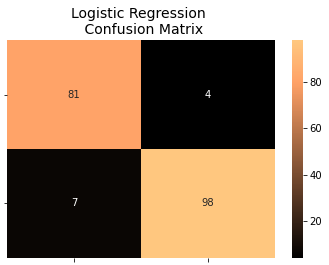

In [37]:
log_reg_cf = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(log_reg_cf, annot=True, cmap=plt.cm.copper)
ax.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax.set_yticklabels(['', ''], fontsize=14, rotation=360)

### CLASSIFICATION REPORT

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        85
           1       0.96      0.93      0.95       105

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



## TEST CASE

In [40]:
test_case_list = [239.93, -2.303349568, 1.75924746, -0.359744743, 2.330243051, -0.821628328, -0.075787571, 0.562319782, -0.399146578, -0.238253368, -1.525411627, 2.032912158, -6.560124295, 0.022937323, -1.470101536, -0.698826069, -2.282193829, -4.781830856, -2.615664945, -1.334441067, -0.430021867, -0.294166318, -0.932391057, 0.172726296, -0.087329538, -0.156114265, -0.542627889, 0.039565989, -0.153028797]

test_case_df = pd.DataFrame(test_case_list)               # converting the list into a dataframe
test_case = test_case_df.T                                # the shape of current df is (11,1) and the required shape is (1,11)
test_case_prediction = model.predict(test_case)           # predicting the quality for test case
if(test_case_prediction == 0):                            # generating the result.
    print('The Transaction was Valid')
else:
    print('The Transaction was Fraud.')

The Transaction was Fraud.
